In [35]:
import pandas as pd
import matplotlib.pyplot as plt

all_data = pd.read_csv('data.csv')
all_data = all_data.iloc[::-1].reset_index(drop=True)
# Reset the 'No' column to match the new row order (0 to len-1)
all_data['No'] = range(len(all_data))

# # Fix negative Crude_oil value by shifting all values by +38
all_data['Crude_oil'] = all_data['Crude_oil'] + 38
# print(f"Crude_oil shifted by +38 to eliminate negative values")
# print(f"New range: [{all_data['Crude_oil'].min():.2f}, {all_data['Crude_oil'].max():.2f}]")

# Data Viz

In [36]:
# Display column names
print("Column Names:")
print(list(all_data.columns))
print("\n" + "="*80 + "\n")

# Display first few rows
print("Sample Data:")
print(all_data.head(3))
print("\n...")
print(f"\n[{len(all_data)} total rows]")
# all_data['No'] = all_data['No'] - 295

Column Names:
['No', 'Date', 'Natural_Gas', 'Natural_Gas_Vol.', 'Crude_oil', 'Crude_oil_Vol.', 'Copper', 'Copper_Vol.', 'Bitcoin', 'Bitcoin_Vol.', 'Ethereum', 'Ethereum_Vol.', 'S&P_500', 'Nasdaq_100_Price', 'Nasdaq_100_Vol.', 'Apple', 'Apple_Vol.', 'Tesla', 'Tesla_Vol.', 'Microsoft', 'Microsoft_Vol.', 'Silver', 'Silver_Vol.', 'Google', 'Google_Vol.', 'Nvidia', 'Nvidia_Vol.', 'Berkshire', 'Berkshire_Vol.', 'Netflix', 'Netflix_Vol.', 'Amazon', 'Amazon_Vol.', 'Meta', 'Meta_Vol.', 'Gold', 'Gold_Vol.']


Sample Data:
   No      Date  Natural_Gas  Natural_Gas_Vol.  Crude_oil  Crude_oil_Vol.  \
0   0  2/1/2020        2.122            164570      99.18          486870   
1   1  3/1/2020        2.130            144670     101.05          885860   
2   2  6/1/2020        2.135            154680     101.27          724240   

   Copper  Copper_Vol.  Bitcoin  Bitcoin_Vol.  ...  Berkshire  Berkshire_Vol.  \
0   2.825        72460     6967        632780  ...     342261             410   
1   2.787  

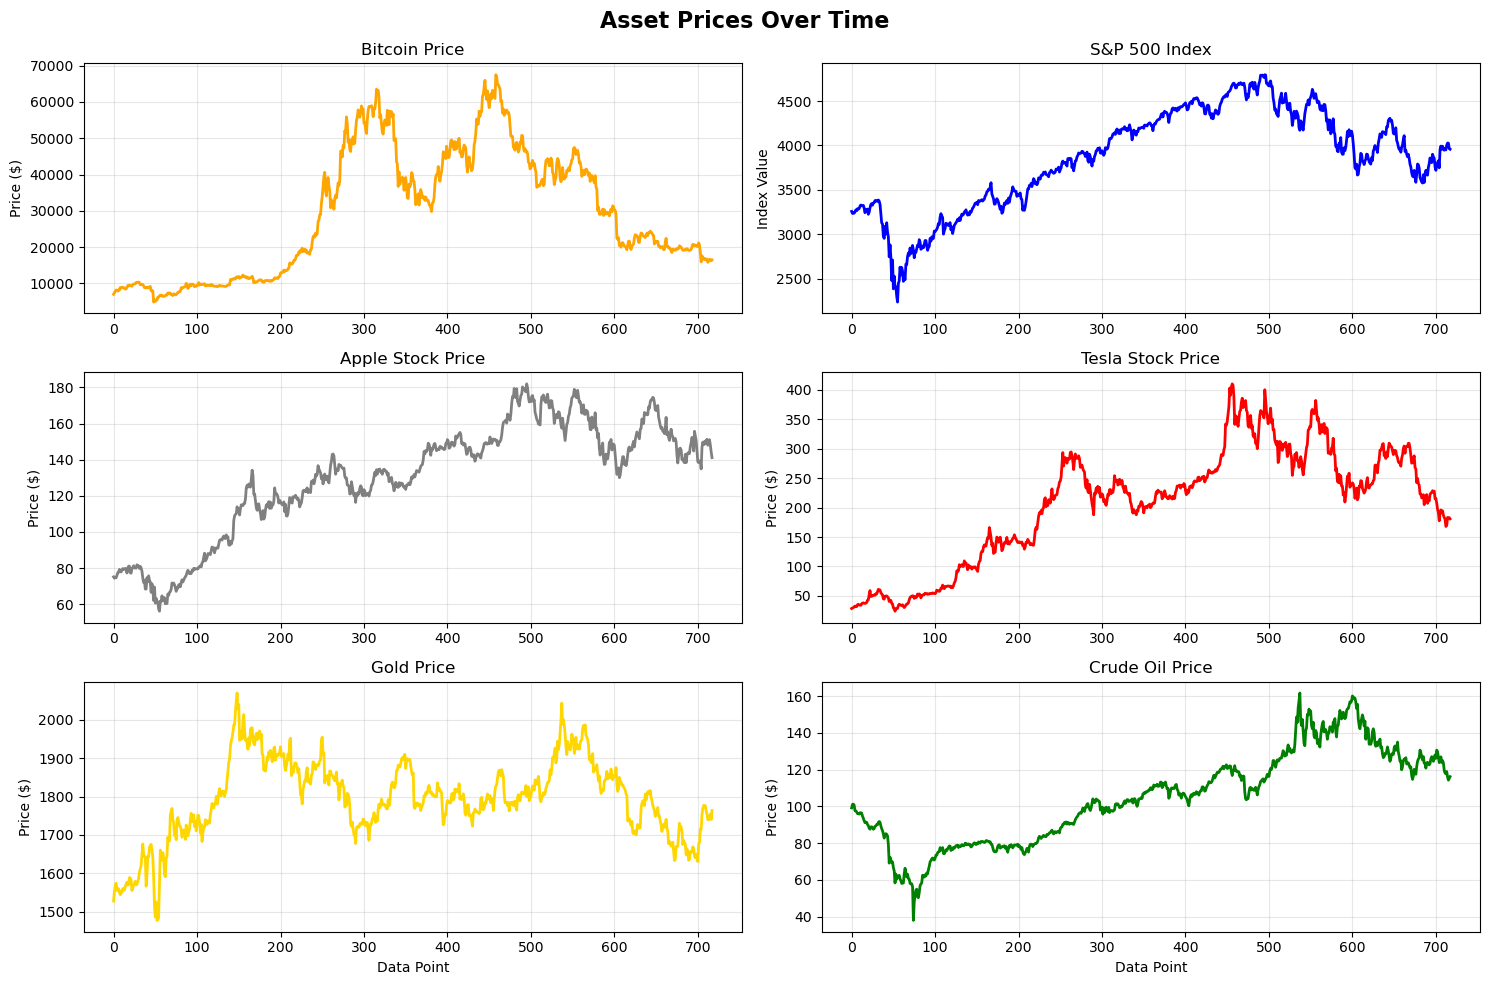

In [37]:
# Plot key assets over time
fig, axes = plt.subplots(3, 2, figsize=(15, 10))
fig.suptitle('Asset Prices Over Time', fontsize=16, fontweight='bold')

# Bitcoin
axes[0, 0].plot(all_data['No'], all_data['Bitcoin'], color='orange', linewidth=2)
axes[0, 0].set_title('Bitcoin Price')
axes[0, 0].set_ylabel('Price ($)')
axes[0, 0].grid(True, alpha=0.3)

# S&P 500
axes[0, 1].plot(all_data['No'], all_data['S&P_500'], color='blue', linewidth=2)
axes[0, 1].set_title('S&P 500 Index')
axes[0, 1].set_ylabel('Index Value')
axes[0, 1].grid(True, alpha=0.3)

# Apple
axes[1, 0].plot(all_data['No'], all_data['Apple'], color='gray', linewidth=2)
axes[1, 0].set_title('Apple Stock Price')
axes[1, 0].set_ylabel('Price ($)')
axes[1, 0].grid(True, alpha=0.3)

# Tesla
axes[1, 1].plot(all_data['No'], all_data['Tesla'], color='red', linewidth=2)
axes[1, 1].set_title('Tesla Stock Price')
axes[1, 1].set_ylabel('Price ($)')
axes[1, 1].grid(True, alpha=0.3)

# Gold
axes[2, 0].plot(all_data['No'], all_data['Gold'], color='gold', linewidth=2)
axes[2, 0].set_title('Gold Price')
axes[2, 0].set_xlabel('Data Point')
axes[2, 0].set_ylabel('Price ($)')
axes[2, 0].grid(True, alpha=0.3)

# Crude Oil
axes[2, 1].plot(all_data['No'], all_data['Crude_oil'], color='green', linewidth=2)
axes[2, 1].set_title('Crude Oil Price')
axes[2, 1].set_xlabel('Data Point')
axes[2, 1].set_ylabel('Price ($)')
axes[2, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig("progress_report/media/asset_price.pdf")

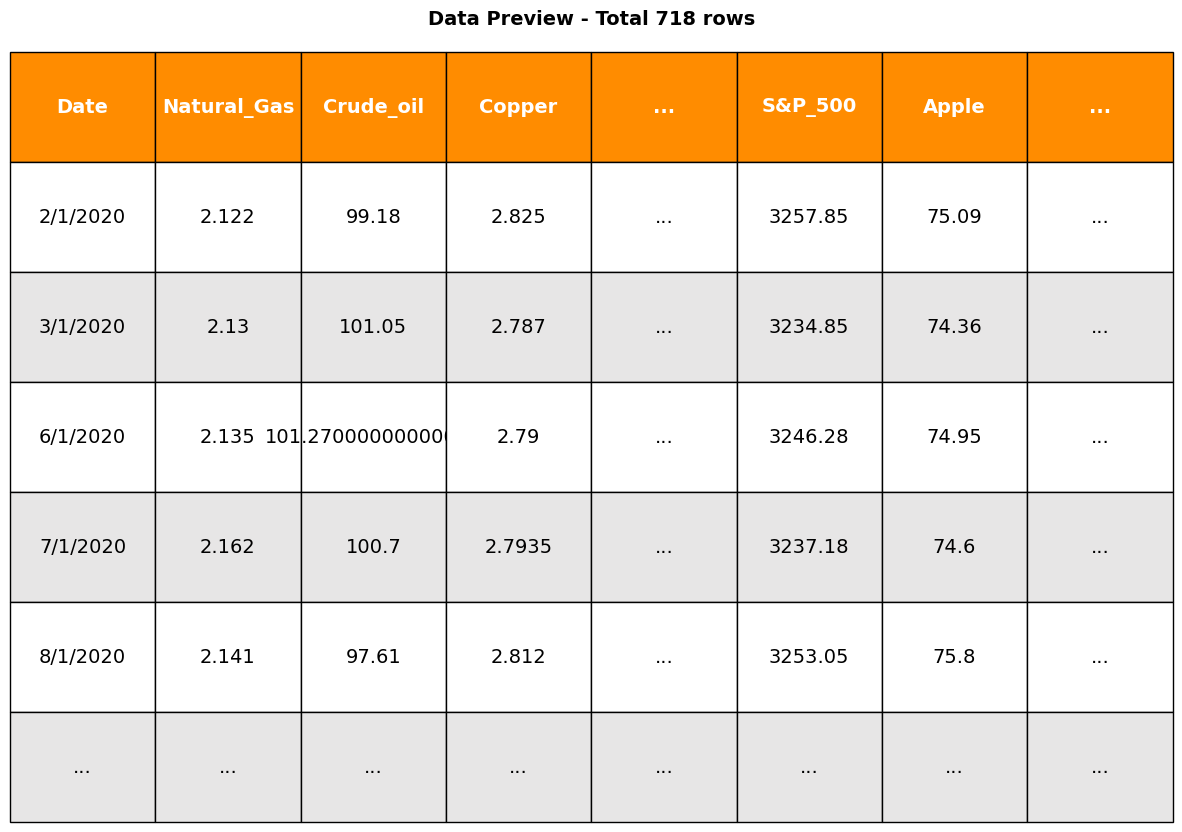

In [38]:
# Visualize data in table format (Excel-like) - selected columns only
import matplotlib.pyplot as plt

# Create figure
fig, ax = plt.subplots(figsize=(15, 10))
ax.axis('tight')
ax.axis('off')

# Select specific columns to display
selected_cols = ['Date', 'Natural_Gas', 'Crude_oil', 'Copper', '...', 'S&P_500', 'Apple', '...']

# Get data for selected columns (skip '...' placeholders)
table_data = [selected_cols]  # Header row

# Get first 5 data rows
for idx in range(5):
    row = []
    row.append(all_data.iloc[idx]['Date'])
    row.append(all_data.iloc[idx]['Natural_Gas'])
    row.append(all_data.iloc[idx]['Crude_oil'])
    row.append(all_data.iloc[idx]['Copper'])
    row.append('...')
    row.append(all_data.iloc[idx]['S&P_500'])
    row.append(all_data.iloc[idx]['Apple'])
    row.append('...')
    table_data.append(row)

# Add final row with dots
table_data.append(['...'] * len(selected_cols))

# Create table
table = ax.table(cellText=table_data, 
                 cellLoc='center',
                 loc='center',
                 bbox=[0, 0, 1, 1])

# Style the table
table.auto_set_font_size(False)
table.set_fontsize(14)
table.scale(1, 2.5)

# Make header row bold and with different color
for i in range(len(selected_cols)):
    cell = table[(0, i)]
    cell.set_facecolor('#FF8C00')
    cell.set_text_props(weight='bold', color='white')

# Alternate row colors for data rows
for i in range(1, len(table_data)):
    for j in range(len(selected_cols)):
        cell = table[(i, j)]
        if i % 2 == 0:
            cell.set_facecolor('#E7E6E6')
        else:
            cell.set_facecolor('#FFFFFF')

plt.title(f'Data Preview - Total {len(all_data)} rows', 
          fontsize=14, fontweight='bold', pad=20)
plt.savefig("progress_report/media/data_preview.pdf")

# Data Preprocessing 
Here we do:
- Log return of the data
- why pick Autocorrelation analysis for lag parameter selection
- perform PCA to select most important features
- Sliding window to create sequences for time series modeling


In [39]:
# STEP 1: Split data into train and test
# Pattern: First 574 rows (287 + 287) for train, next 144 rows for test

import numpy as np

price_vol_columns = [
    'Natural_Gas', 'Crude_oil', 'Copper', 'Bitcoin', 'Ethereum', 
    'S&P_500', 'Nasdaq_100_Price', 'Apple', 'Tesla', 'Microsoft', 
    'Silver', 'Google', 'Nvidia', 'Berkshire', 'Netflix', 
    'Amazon', 'Meta', 'Gold'
]

# Define segment sizes
train_size = 574  # 287 + 287
test_size = 144

# Helper function to calculate log returns
def calculate_log_returns(data, price_columns):
    """Calculate log returns for a dataset"""
    # Reset the index of the input data to ensure shift works correctly
    data_reset = data.reset_index(drop=True)
    
    log_ret = pd.DataFrame()
    log_ret['No'] = data_reset['No'].values[1:]  # Skip first row
    log_ret['Date'] = data_reset['Date'].values[1:]  # Skip first row
    
    for col in price_columns:
        # Calculate log returns: log(P_t / P_{t-1})
        log_ret[f'{col}_LogReturn'] = np.log(data_reset[col].values[1:] / data_reset[col].values[:-1])
    
    # Reset index after creation
    log_ret = log_ret.reset_index(drop=True)
    
    # Check for NaN values in log returns
    nan_check = log_ret.select_dtypes(include=[np.number]).isna().sum()
    total_nans = nan_check.sum()
    
    print(f"NaN Check for Log Returns:")
    print("="*60)
    if total_nans > 0:
        print(f"⚠️ WARNING: Found {total_nans} NaN values!")
        print("\nNaN count by column:")
        for col, count in nan_check.items():
            if count > 0:
                print(f"  {col}: {count} NaN values")
    else:
        print(f"✓ No NaN values detected")
    print()
    
    return log_ret

# Split into train and test
train_raw = all_data.iloc[0:train_size].copy()
test_raw = all_data.iloc[train_size:train_size + test_size].copy()

print("Raw Data Split:")
print("="*60)
print(f"Train: rows 0-{train_size-1} ({len(train_raw)} rows)")
print(f"Test: rows {train_size}-{train_size + test_size - 1} ({len(test_raw)} rows)")

# STEP 2: Calculate log returns for each segment
train_traj = calculate_log_returns(train_raw, price_vol_columns)
test_traj = calculate_log_returns(test_raw, price_vol_columns)

print("\nLog Returns After Calculation:")
print("="*60)
print(f"Train traj: {len(train_traj)} rows")
print(f"Test traj: {len(test_traj)} rows")

# Create combined log returns for visualization only
log_returns = pd.DataFrame()
log_returns['No'] = all_data['No']
log_returns['Date'] = all_data['Date']
for col in price_vol_columns:
    log_returns[f'{col}_LogReturn'] = np.log(all_data[col] / all_data[col].shift(1))

print(f"\nCombined log returns (for viz only): {log_returns.shape}")

# Check for NaN in combined log returns
nan_check_combined = log_returns.select_dtypes(include=[np.number]).isna().sum()
total_nans_combined = nan_check_combined.sum()
print(f"\nNaN Check for Combined Log Returns:")
print("="*60)
if total_nans_combined > 0:
    print(f"⚠️ WARNING: Found {total_nans_combined} NaN values!")
    print("\nNaN count by column:")
    for col, count in nan_check_combined.items():
        if count > 0:
            print(f"  {col}: {count} NaN values")
else:
    print(f"✓ No NaN values detected (excluding first row from shift operation)")


Raw Data Split:
Train: rows 0-573 (574 rows)
Test: rows 574-717 (144 rows)
NaN Check for Log Returns:
✓ No NaN values detected

NaN Check for Log Returns:
✓ No NaN values detected


Log Returns After Calculation:
Train traj: 573 rows
Test traj: 143 rows

Combined log returns (for viz only): (718, 20)

NaN Check for Combined Log Returns:
⚠️ WARNING: Found 18 NaN values!

NaN count by column:
  Natural_Gas_LogReturn: 1 NaN values
  Crude_oil_LogReturn: 1 NaN values
  Copper_LogReturn: 1 NaN values
  Bitcoin_LogReturn: 1 NaN values
  Ethereum_LogReturn: 1 NaN values
  S&P_500_LogReturn: 1 NaN values
  Nasdaq_100_Price_LogReturn: 1 NaN values
  Apple_LogReturn: 1 NaN values
  Tesla_LogReturn: 1 NaN values
  Microsoft_LogReturn: 1 NaN values
  Silver_LogReturn: 1 NaN values
  Google_LogReturn: 1 NaN values
  Nvidia_LogReturn: 1 NaN values
  Berkshire_LogReturn: 1 NaN values
  Netflix_LogReturn: 1 NaN values
  Amazon_LogReturn: 1 NaN values
  Meta_LogReturn: 1 NaN values
  Gold_LogReturn: 1 

In [40]:
# Detailed diagnostic: Check for zeros and negative values in price data
print("Detailed Price Data Diagnostic:")
print("="*60)

for col in price_vol_columns:
    train_zeros = (train_raw[col] == 0).sum()
    train_negatives = (train_raw[col] < 0).sum()
    test_zeros = (test_raw[col] == 0).sum()
    test_negatives = (test_raw[col] < 0).sum()
    
    if train_zeros > 0 or train_negatives > 0 or test_zeros > 0 or test_negatives > 0:
        print(f"\n{col}:")
        if train_zeros > 0:
            print(f"  Train: {train_zeros} zero values")
        if train_negatives > 0:
            print(f"  Train: {train_negatives} negative values")
        if test_zeros > 0:
            print(f"  Test: {test_zeros} zero values")
        if test_negatives > 0:
            print(f"  Test: {test_negatives} negative values")

# Check if there are any NaN in original price data
print("\nChecking for NaN in original price data:")
for col in price_vol_columns:
    train_nan = train_raw[col].isna().sum()
    test_nan = test_raw[col].isna().sum()
    if train_nan > 0 or test_nan > 0:
        print(f"{col}: Train={train_nan}, Test={test_nan}")

print("\n" + "="*60)

Detailed Price Data Diagnostic:

Checking for NaN in original price data:



In [41]:
# Check the actual test data more carefully
print("Test Data Investigation:")
print("="*60)
print(f"Test raw shape: {test_raw.shape}")
print(f"Test traj shape: {test_traj.shape}")
print(f"\nFirst few rows of test_raw:")
print(test_raw[['Date'] + price_vol_columns[:3]].head())
print(f"\nFirst few rows of test_traj:")
print(test_traj[['Date'] + [f'{col}_LogReturn' for col in price_vol_columns[:3]]].head())
print(f"\nLast few rows of test_traj:")
print(test_traj[['Date'] + [f'{col}_LogReturn' for col in price_vol_columns[:3]]].tail())

Test Data Investigation:
Test raw shape: (144, 37)
Test traj shape: (143, 20)

First few rows of test_raw:
           Date  Natural_Gas  Crude_oil  Copper
574  29-04-2022        7.244     142.69  4.4245
575    2/5/2022        7.475     143.17  4.2840
576    3/5/2022        7.954     140.41  4.3025
577    4/5/2022        8.415     145.81  4.3530
578    5/5/2022        8.783     146.26  4.3090

First few rows of test_traj:
       Date  Natural_Gas_LogReturn  Crude_oil_LogReturn  Copper_LogReturn
0  2/5/2022               0.031391             0.003358         -0.032270
1  3/5/2022               0.062111            -0.019466          0.004309
2  4/5/2022               0.056341             0.037738          0.011669
3  5/5/2022               0.042802             0.003081         -0.010159
4  6/5/2022              -0.088016             0.010271         -0.003604

Last few rows of test_traj:
           Date  Natural_Gas_LogReturn  Crude_oil_LogReturn  Copper_LogReturn
138  22-11-2022         

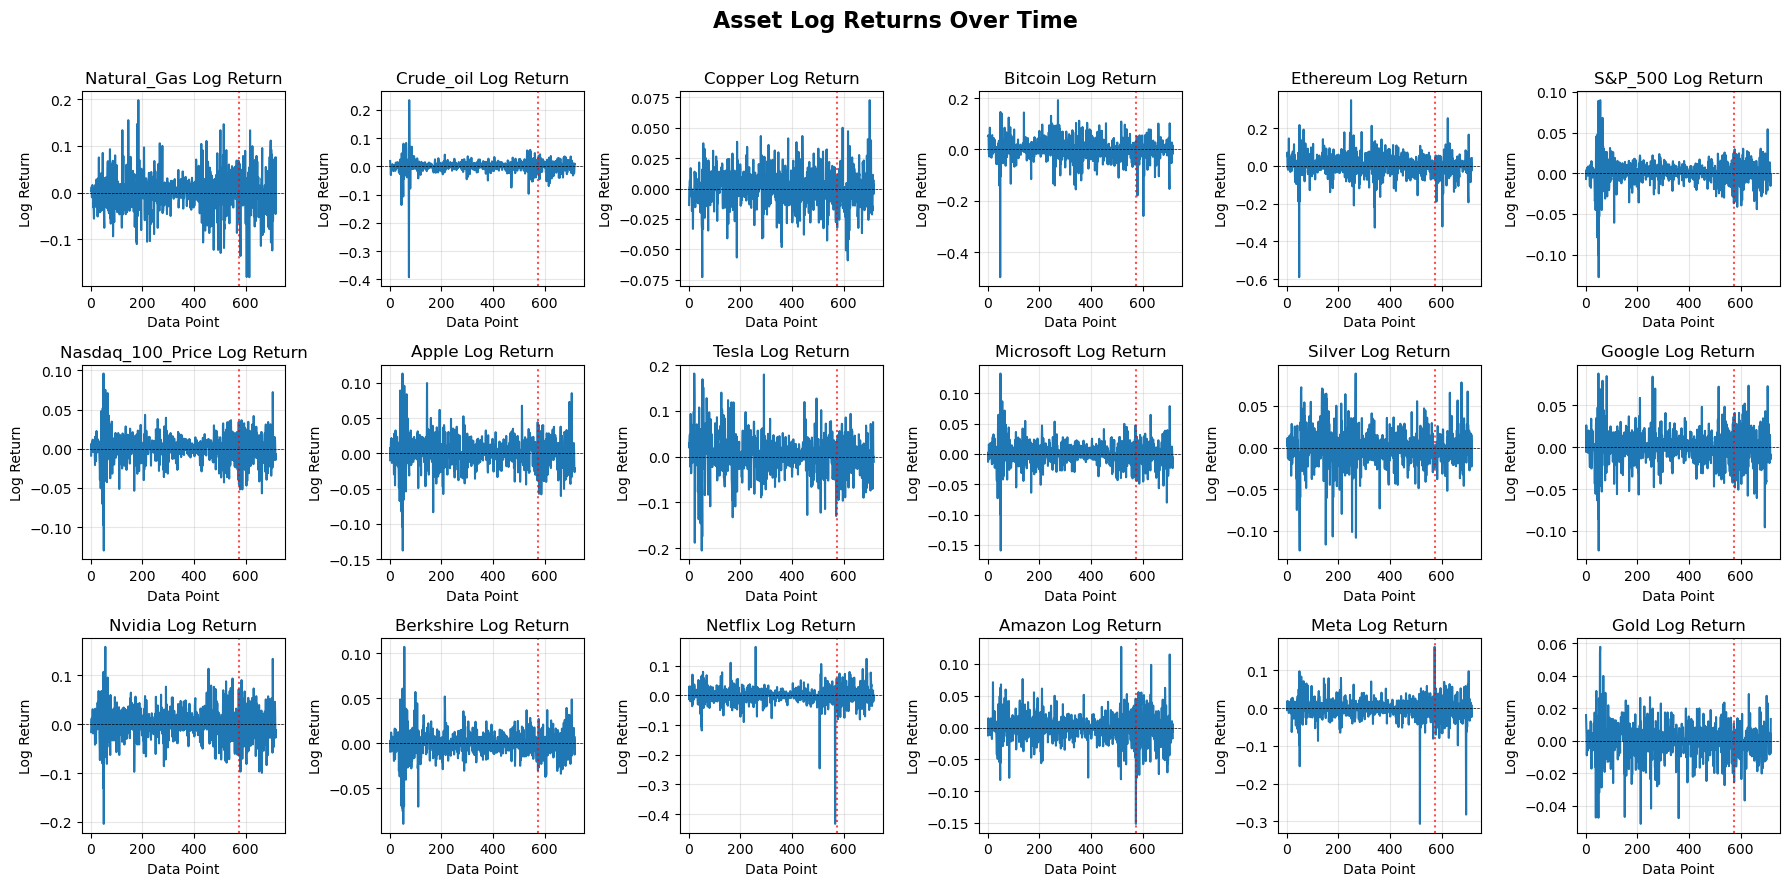

In [42]:
import math
import matplotlib.pyplot as plt

# Define list of asset names
price_vol_columns = [
    'Natural_Gas', 'Crude_oil', 'Copper', 'Bitcoin', 'Ethereum', 
    'S&P_500', 'Nasdaq_100_Price', 'Apple', 'Tesla', 'Microsoft', 
    'Silver', 'Google', 'Nvidia', 'Berkshire', 'Netflix', 
    'Amazon', 'Meta', 'Gold'
]

# Calculate grid size for subplots
n_assets = len(price_vol_columns)
n_cols = 6  # Number of columns per row
n_rows = 3 #math.ceil(n_assets / n_cols)

# Create figure and axes
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 3))
fig.suptitle('Asset Log Returns Over Time', fontsize=16, fontweight='bold')

# Flatten axes array for easy iteration
axes = axes.flatten()

# Define train/test boundary (574 - 1 = 573 because log returns start from row 1)
train_test_boundary = 573

# Plot each asset
for i, asset in enumerate(price_vol_columns):
    col_name = f'{asset}_LogReturn'
    axes[i].plot(log_returns['No'], log_returns[col_name], linewidth=1.5)
    axes[i].set_title(f'{asset} Log Return')
    axes[i].set_ylabel('Log Return')
    axes[i].set_xlabel('Data Point')
    axes[i].grid(True, alpha=0.3)
    axes[i].axhline(y=0, color='black', linestyle='--', linewidth=0.5)
    
    # Add vertical dotted line at train/test boundary
    axes[i].axvline(x=train_test_boundary, color='red', linestyle=':', linewidth=1.5, alpha=0.7, label='Train/Test Split')

# Hide unused subplots (if any)
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.savefig("progress_report/media/all_asset_log_returns.pdf")
plt.show()


In [43]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

target_col = 'S&P_500_LogReturn'
feature_cols = [col for col in log_returns.columns if col.endswith('_LogReturn') and col != target_col]

log_returns_clean = log_returns.dropna()
features_only = log_returns_clean[feature_cols]
X = log_returns_clean[feature_cols].values

# print(f"gan{len(features_only)}")

lag_size = 70

print(X.shape)
print(X)

import numpy as np
print(features_only)
voting_score_PCA = np.zeros(17)

lag_i = 0
while True:
    if lag_i + lag_size > X.shape[0]:
        break
    print(X[lag_i:lag_i+lag_size,:].shape)
    X_lag = X[lag_i:lag_i+lag_size,:]
    
    
    # PCA with n=6
    pca = PCA(n_components=10)
    pca.fit(X_lag)
    
    # Get feature names
    feature_names = [col.replace('_LogReturn', '') for col in feature_cols]
    
    # Print top 6 components
    print(f"Lag window {lag_i}-{lag_i+lag_size-1}:")
    for i in range(10):
        loadings = np.abs(pca.components_[i])
        top_idx = np.argmax(loadings)
        print(f"  PC{i+1}: {feature_names[top_idx]} ({pca.explained_variance_ratio_[i]:.3f})")
        voting_score_PCA[top_idx] = 10 * 1/(i+1) + voting_score_PCA[top_idx]
    
    lag_i = lag_i + lag_size

print(feature_names)
print(voting_score_PCA)
    
    
    


(717, 17)
[[ 0.00376294  0.01867906 -0.01354262 ... -0.01219204 -0.00530531
   0.01577699]
 [ 0.00234467  0.00217477  0.00107585 ...  0.01471783  0.01865841
   0.01050888]
 [ 0.01256707 -0.00564442  0.00125369 ...  0.00209996  0.00216135
   0.00349973]
 ...
 [-0.03963678 -0.01442124  0.00358473 ... -0.0076784  -0.00742235
   0.00480056]
 [-0.04543589  0.00836533 -0.00455205 ...  0.00576432 -0.0238896
  -0.00784138]
 [ 0.07503339  0.00829593  0.0063396  ... -0.01641932  0.00623169
   0.01335636]]
     Natural_Gas_LogReturn  Crude_oil_LogReturn  Copper_LogReturn  \
1                 0.003763             0.018679         -0.013543   
2                 0.002345             0.002175          0.001076   
3                 0.012567            -0.005644          0.001254   
4                -0.009761            -0.031166          0.006601   
5                 0.011609            -0.000512         -0.003563   
..                     ...                  ...               ...   
713             

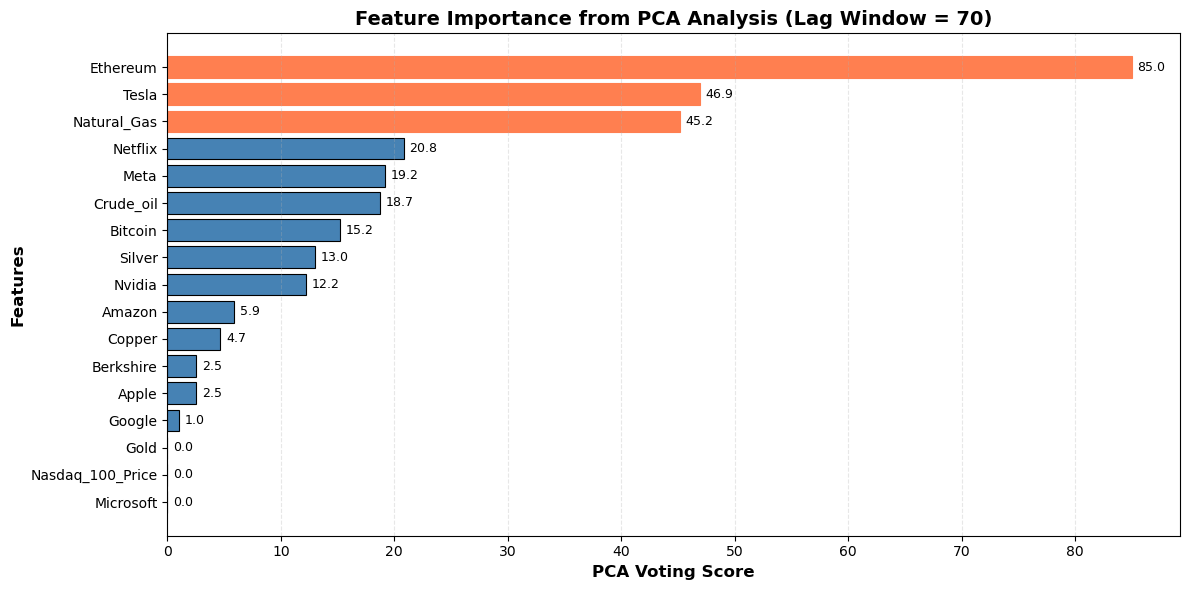

In [44]:
import matplotlib.pyplot as plt

# Sort features by voting score
sorted_indices = np.argsort(voting_score_PCA)[::-1]
sorted_features = [feature_names[i] for i in sorted_indices]
sorted_scores = voting_score_PCA[sorted_indices]

# Create bar plot
fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.barh(sorted_features, sorted_scores, color='steelblue', edgecolor='black', linewidth=0.8)

# Highlight top 3 features
for i in range(min(3, len(bars))):
    bars[i].set_color('coral')

ax.set_xlabel('PCA Voting Score', fontsize=12, fontweight='bold')
ax.set_ylabel('Features', fontsize=12, fontweight='bold')
ax.set_title('Feature Importance from PCA Analysis (Lag Window = 70)', fontsize=14, fontweight='bold')
ax.grid(True, axis='x', alpha=0.3, linestyle='--')
ax.invert_yaxis()

# Add value labels on bars
for i, (feature, score) in enumerate(zip(sorted_features, sorted_scores)):
    ax.text(score + 0.5, i, f'{score:.1f}', va='center', fontsize=9)

plt.tight_layout()
plt.savefig("progress_report/media/pca_feature_importance.pdf")
plt.show()

# Training

In [45]:
# Display feature matrix sizes for train and test sets

print("="*60)
print("FEATURE MATRICES")
print("="*60)

print(f"\nTrain Data:")
print(f"  Data shape: {train_traj.shape}")

print(f"\nTest Data:")
print(f"  Data shape: {test_traj.shape}")

print("\n" + "="*60)


FEATURE MATRICES

Train Data:
  Data shape: (573, 20)

Test Data:
  Data shape: (143, 20)



In [46]:
# Select top 10 features based on PCA voting scores
top_10_indices = np.argsort(voting_score_PCA)[::-1][:10]
feature_trained_name = [feature_names[i] for i in top_10_indices]

print("Top 10 Features Selected for Training:")
print(feature_trained_name)
print("="*60)
for i, (idx, name) in enumerate(zip(top_10_indices, feature_trained_name)):
    print(f"{i+1}. {name:20s} (Score: {voting_score_PCA[idx]:.2f})")

top_10_feature_cols = [f'{name}_LogReturn' for name in feature_trained_name]

# Extract training and test features
X_traj_train = train_traj[top_10_feature_cols].values
X_traj_test = test_traj[top_10_feature_cols].values

print(f"\nTraining Data Shape: {X_traj_train.shape}")
print(f"({X_traj_train.shape[0]} samples, {X_traj_train.shape[1]} features)")
print(f"\nTest Data Shape: {X_traj_test.shape}")
print(f"({X_traj_test.shape[0]} samples, {X_traj_test.shape[1]} features)")

Top 10 Features Selected for Training:
['Ethereum', 'Tesla', 'Natural_Gas', 'Netflix', 'Meta', 'Crude_oil', 'Bitcoin', 'Silver', 'Nvidia', 'Amazon']
1. Ethereum             (Score: 85.00)
2. Tesla                (Score: 46.93)
3. Natural_Gas          (Score: 45.17)
4. Netflix              (Score: 20.83)
5. Meta                 (Score: 19.19)
6. Crude_oil            (Score: 18.69)
7. Bitcoin              (Score: 15.21)
8. Silver               (Score: 13.00)
9. Nvidia               (Score: 12.23)
10. Amazon               (Score: 5.90)

Training Data Shape: (573, 10)
(573 samples, 10 features)

Test Data Shape: (143, 10)
(143 samples, 10 features)


In [47]:
# Generate target variables: S&P 500 log returns
y_traj_train = train_traj['S&P_500_LogReturn'].values
y_traj_test = test_traj['S&P_500_LogReturn'].values

print("Target Variable (S&P 500 Log Returns):")
print("="*60)
print(f"\nTraining Target:")
print(f"  Shape: {y_traj_train.shape}")
print(f"  Samples: {len(y_traj_train)}")
print(f"  Mean: {y_traj_train.mean():.6f}")
print(f"  Std Dev: {y_traj_train.std():.6f}")
print(f"  Min: {y_traj_train.min():.6f}")
print(f"  Max: {y_traj_train.max():.6f}")

print(f"\nTest Target:")
print(f"  Shape: {y_traj_test.shape}")
print(f"  Samples: {len(y_traj_test)}")
print(f"  Mean: {y_traj_test.mean():.6f}")
print(f"  Std Dev: {y_traj_test.std():.6f}")
print(f"  Min: {y_traj_test.min():.6f}")
print(f"  Max: {y_traj_test.max():.6f}")

Target Variable (S&P 500 Log Returns):

Training Target:
  Shape: (573,)
  Samples: 573
  Mean: 0.000479
  Std Dev: 0.016268
  Min: -0.127652
  Max: 0.089683

Test Target:
  Shape: (143,)
  Samples: 143
  Mean: -0.000301
  Std Dev: 0.016337
  Min: -0.044199
  Max: 0.053953


In [48]:
# Create sliding window sequences for training
# Window size N = 4: use data from t=k-3, k-2, k-1, k to predict t=k+1

N = 10  # Window size

def create_sliding_window_sequences(X_traj, y_traj, window_size):

    num_samples = len(X_traj)
    num_features = X_traj.shape[1]
    
    # We need at least window_size points to create a sequence
    # and we predict the next point, so we need window_size + 1 total points
    num_sequences = num_samples - window_size
    
    X_sequences = []
    y_sequences = []
    
    for i in range(num_sequences):
        # Extract window from t=i to t=i+window_size-1 (inclusive)
        X_window = X_traj[i:i+window_size, :]  # Shape: (window_size, features)
        
        # Target is the next time step
        y_next = y_traj[i + window_size]
        
        X_sequences.append(X_window)
        y_sequences.append(y_next)
    
    X_sequences = np.array(X_sequences)  # Shape: (num_sequences, window_size, features)
    y_sequences = np.array(y_sequences)  # Shape: (num_sequences,)
    
    return X_sequences, y_sequences

# Create training sequences
X_train, y_train = create_sliding_window_sequences(X_traj_train, y_traj_train, N)

# Create test sequences
X_test, y_test = create_sliding_window_sequences(X_traj_test, y_traj_test, N)

print("Sliding Window Sequences Created:")
print("="*60)
print(f"\nWindow Size: {N}")
print(f"\nTraining Data:")
print(f"  X_train shape: {X_train.shape}")
print(f"  ({X_train.shape[0]} sequences, {X_train.shape[1]} time steps, {X_train.shape[2]} features)")
print(f"  y_train shape: {y_train.shape}")
print(f"  ({y_train.shape[0]} targets)")

print(f"\nTest Data:")
print(f"  X_test shape: {X_test.shape}")
print(f"  ({X_test.shape[0]} sequences, {X_test.shape[1]} time steps, {X_test.shape[2]} features)")
print(f"  y_test shape: {y_test.shape}")
print(f"  ({y_test.shape[0]} targets)")

print(f"\nExample:")
print(f"  Each sequence uses {N} consecutive time steps to predict the next value")

Sliding Window Sequences Created:

Window Size: 10

Training Data:
  X_train shape: (563, 10, 10)
  (563 sequences, 10 time steps, 10 features)
  y_train shape: (563,)
  (563 targets)

Test Data:
  X_test shape: (133, 10, 10)
  (133 sequences, 10 time steps, 10 features)
  y_test shape: (133,)
  (133 targets)

Example:
  Each sequence uses 10 consecutive time steps to predict the next value


In [49]:
# Shuffle training data
# Keep test data unshuffled to preserve temporal order for evaluation

# Set random seed for reproducibility
np.random.seed(42)

# Create indices and shuffle them
train_indices = np.arange(len(X_train))
np.random.shuffle(train_indices)

# Apply shuffled indices to training data
X_train_shuffled = X_train[train_indices]
y_train_shuffled = y_train[train_indices]

# Update training variables
X_train = X_train_shuffled
y_train = y_train_shuffled

print("Data Shuffling Complete:")
print("="*60)
print(f"Training data shuffled: {len(X_train)} sequences")
print(f"Test data unchanged: {len(X_test)} sequences (temporal order preserved)")
print(f"\nRandom seed: 42")

Data Shuffling Complete:
Training data shuffled: 563 sequences
Test data unchanged: 133 sequences (temporal order preserved)

Random seed: 42


In [50]:
# Save processed data to avoid reprocessing
import pickle

# Create a dictionary with all processed data
processed_data = {
    'X_train': X_train,
    'y_train': y_train,
    'X_test': X_test,
    'y_test': y_test,
    'feature_trained_name': feature_trained_name,
    'window_size': N,
    'metadata': {
        'train_shape': X_train.shape,
        'test_shape': X_test.shape,
        'num_features': X_train.shape[2],
        'sequence_length': X_train.shape[1],
        'train_samples': len(X_train),
        'test_samples': len(X_test)
    }
}

# Save to pickle file
save_path = 'processed_data.pkl'
with open(save_path, 'wb') as f:
    pickle.dump(processed_data, f)

print("Processed Data Saved:")
print("="*60)
print(f"File: {save_path}")
print(f"\nContents:")
print(f"  X_train: {X_train.shape}")
print(f"  y_train: {y_train.shape}")
print(f"  X_test: {X_test.shape}")
print(f"  y_test: {y_test.shape}")
print(f"  feature_trained_name: {len(feature_trained_name)} features")
print(f"  window_size: {N}")
print(f"\nTo load later:")
print(f"  with open('{save_path}', 'rb') as f:")
print(f"      data = pickle.load(f)")
print(f"      X_train = data['X_train']")
print(f"      y_train = data['y_train']")
print(f"      X_test = data['X_test']")
print(f"      y_test = data['y_test']")

Processed Data Saved:
File: processed_data.pkl

Contents:
  X_train: (563, 10, 10)
  y_train: (563,)
  X_test: (133, 10, 10)
  y_test: (133,)
  feature_trained_name: 10 features
  window_size: 10

To load later:
  with open('processed_data.pkl', 'rb') as f:
      data = pickle.load(f)
      X_train = data['X_train']
      y_train = data['y_train']
      X_test = data['X_test']
      y_test = data['y_test']


In [51]:
with open('processed_data.pkl', 'rb') as f:
    data = pickle.load(f)
    X_train = data['X_train']
    y_train = data['y_train']
    X_test = data['X_test']
    y_test = data['y_test']